In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os
os.chdir('../code/')
from dataclasses import *

In [2]:
reviewsdf = pd.read_pickle('../data/reviewsred.pk')
cooktimes = pd.read_pickle('../data/cooktimesclean.pk')
keywords =  pd.read_pickle('../data/keywords.pk')

In [3]:
user_ratings,recipe_reviewers = get_dictionaries(reviewsdf,'AuthorId','RecipeId','Rating')

user_ratings_var = {user:convert_ratings(user_ratings[user]) for user in user_ratings}

reviewsdf['Rating0']=[user_ratings_var[reviewsdf['AuthorId'][i]][reviewsdf['RecipeId'][i]]
                      for i in reviewsdf.index]

In [7]:
users_all = list(user_ratings.keys())
users_top = [user for user in users_all if len(user_ratings[user])>99]

In [42]:
reclabels = pd.read_pickle('../data/recipelabels.pk')

In [14]:
ingredientsdf = pd.read_pickle('../data/rec_ingredients.pk')

In [44]:
ingredientsdf

,Name,RecipeIngredientParts,RecipeIngredientQuantities
RecipeId,,,
524289,Apple-Glazed Stuffed Pork Chops,"[bacon, leeks, other dry white wine, thyme, sa...","[6, 1, 1⁄4, 1⁄2, 1, 1, 1⁄4, 1, 4]"
524301,Bob's Taco Soup With Pasta,"[ground beef, onion, diced tomatoes, red kidne...","[1 1⁄2, 1, 29, 15 1⁄2, 1, 1, 1, 1, 1⁄2, 1⁄2, 16]"
524315,Crispy Chicken Thighs in Convection Oven,"[skinless chicken thighs, light sour cream, mi...","[1, 3⁄4, 3, 1⁄2, 1⁄4, 1⁄16, 1⁄2, 1⁄4, 1, 1⁄2, ..."
38,Low-Fat Berry Blue Frozen Dessert,"[blueberries, granulated sugar, vanilla yogurt...","[4, 1⁄4, 1, 1]"
39,Biryani,"[saffron, milk, green chili peppers, onions, g...","[1, 4, 2, 2, 8, 1⁄4, 8, 1⁄2, 1, 1, 1⁄4, 1⁄4, 1..."
...,...,...,...
524149,Hidden Veggie Mac and Cheese,"[carrots, cauliflower, low-fat milk, salt, che...","[3, 1, 2, 1⁄2, 1, 2, 8, 4, 16]"
524197,Refreshing Ice Cubes,"[water, water]","[2, 1]"
524229,Coconut Curried Butternut Squash Soup,"[olive oil, salt, ground white pepper, carrot,...","[1, 2, 1, 1, 1⁄2, 1⁄2, 1⁄2, 3, 1⁄2, 2, 6, 1]"


(array([279988.,  23921., 798973.]),
 array([-1.        , -0.33333333,  0.33333333,  1.        ]),
 <BarContainer object of 3 artists>)

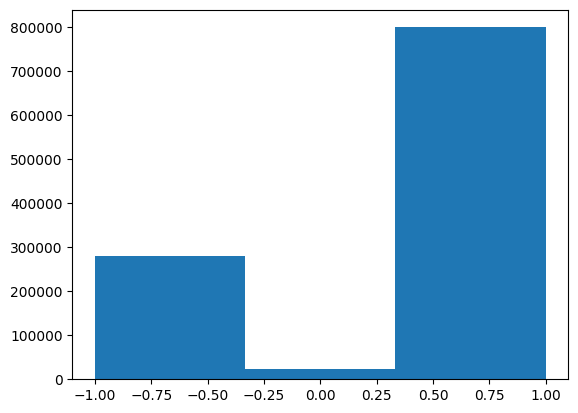

In [59]:
plt.hist(x=reviewsdf.Rating0,bins=3)

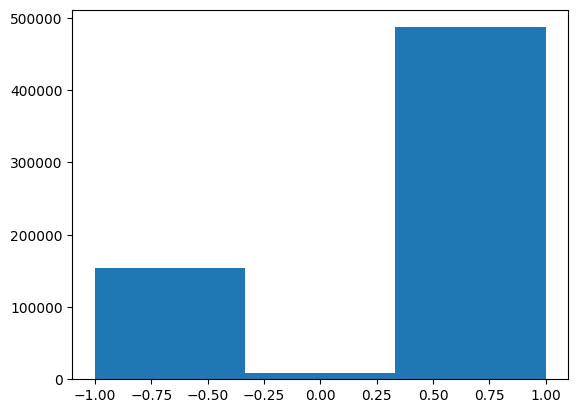

In [12]:
plt.hist(x=reviewsdf.loc[reviewsdf['AuthorId'].isin(users_top)].Rating0,bins=3)
plt.show()

In [149]:
rd = 
rd.add_feature(cooktimes,'Prep')
rd.add_feature(cooktimes,'Cook')
rd.add_feature(cooktimes,'Total')

## Cooking time

Let's add cooking time as a feature.

(array([154133.,   8864., 486999.]),
 array([-1.        , -0.33333333,  0.33333333,  1.        ]),
 <BarContainer object of 3 artists>)

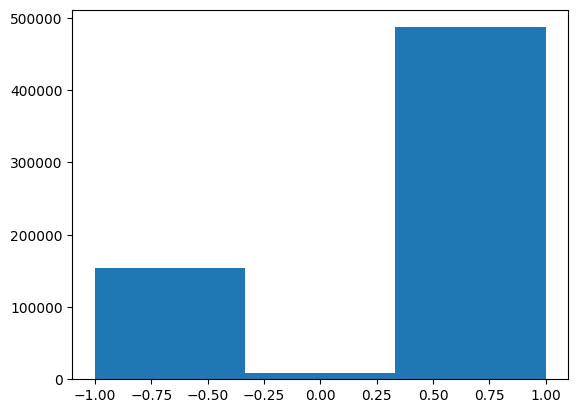

,ReviewId,RecipeId,AuthorId,Rating,Cook,Prep,Total,Rating0
1,7,4384,1634,4,120.0,5.0,125.0,0
2,9,4523,2046,2,30.0,30.0,60.0,-1
3,13,7435,1773,5,200.0,75.0,275.0,1
5,17,5221,2046,4,0.0,0.0,0.0,0
6,19,13307,2046,5,6.0,30.0,36.0,1


In [142]:
len(users_top)

1137

In [143]:
users_top.sort(key = lambda x:np.mean(list(user_ratings_var[x].values())))

In [145]:
df.columns

Index(['ReviewId', 'RecipeId', 'AuthorId', 'Rating', 'Cook', 'Prep', 'Total'], dtype='object')

In [163]:
df.loc[df.AuthorId == users_top[70]]['Rating0']

974097     1
974099     0
974100    -1
974101     0
974102     1
          ..
1260697    1
1263907    0
1265073    0
1265696    0
1317674   -1
Name: Rating0, Length: 287, dtype: int64

In [183]:
df0.loc[df0.Rating0==0]['LogTotal']

974099     2.302585
974101     3.401197
974107     4.174387
974109     6.318968
974114     4.094345
             ...   
1244399    3.218876
1245971    4.007333
1263907    2.639057
1265073    4.174387
1265696    4.442651
Name: LogTotal, Length: 136, dtype: float64

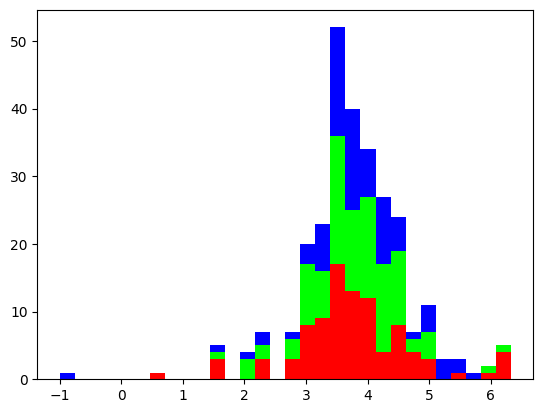

In [191]:
plt.hist(x = [df0.loc[df0.Rating0==-1]['LogTotal'].values,
              df0.loc[df0.Rating0==0]['LogTotal'].values,
              df0.loc[df0.Rating0==1]['LogTotal'].values],
         bins=30,
         histtype = 'barstacked',
         color=[[1,0,0],[0,1,0],[0,0,1]])
plt.show()

In [169]:
df['LogTotal']=df['Total'].apply(log_ext)

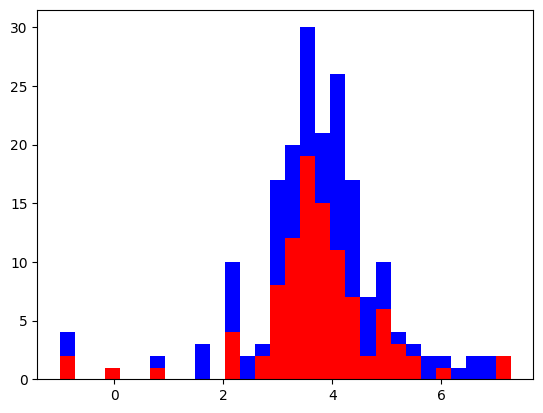

In [195]:
plt.hist(x = [df.loc[df.AuthorId==users_top[90]].loc[df.Rating0==-1]['LogTotal'].values,
              df.loc[df.AuthorId==users_top[90]].loc[df.Rating0== 0]['LogTotal'].values,
              df.loc[df.AuthorId==users_top[90]].loc[df.Rating0== 1]['LogTotal'].values],
         bins=30,
         histtype = 'barstacked',
         color=[[1,0,0],[0,1,0],[0,0,1]])
plt.show()

In [1]:
df0 =df.loc[df.AuthorId == users_top[75]]

NameError: name 'df' is not defined

In [178]:
df0['Rating0'].apply(int_to_color).values

array([list([0, 1, 0]), list([1, 0, 0]), list([0, 0, 1]), list([1, 0, 0]),
       list([0, 1, 0]), list([0, 0, 1]), list([0, 0, 1]), list([1, 0, 0]),
       list([1, 0, 0]), list([1, 0, 0]), list([1, 0, 0]), list([0, 0, 1]),
       list([0, 1, 0]), list([0, 1, 0]), list([0, 0, 1]), list([1, 0, 0]),
       list([1, 0, 0]), list([0, 1, 0]), list([0, 1, 0]), list([0, 0, 1]),
       list([0, 0, 1]), list([1, 0, 0]), list([1, 0, 0]), list([0, 0, 1]),
       list([1, 0, 0]), list([1, 0, 0]), list([0, 0, 1]), list([1, 0, 0]),
       list([0, 1, 0]), list([1, 0, 0]), list([1, 0, 0]), list([0, 0, 1]),
       list([1, 0, 0]), list([1, 0, 0]), list([1, 0, 0]), list([1, 0, 0]),
       list([1, 0, 0]), list([1, 0, 0]), list([0, 0, 1]), list([0, 0, 1]),
       list([1, 0, 0]), list([1, 0, 0]), list([1, 0, 0]), list([0, 1, 0]),
       list([0, 1, 0]), list([1, 0, 0]), list([1, 0, 0]), list([0, 0, 1]),
       list([1, 0, 0]), list([0, 0, 1]), list([0, 0, 1]), list([0, 1, 0]),
       list([0, 1, 0]), l

In [18]:
ingredientsdf['RecipeIngredientParts'].values

array([list(['bacon', 'leeks', 'other dry white wine', 'thyme', 'salt', 'pepper', 'dijon-style mustard', 'boneless pork loin chops']),
       list(['ground beef', 'onion', 'diced tomatoes', 'red kidney beans', 'corn', 'green chili', 'bow tie pasta', 'sour cream']),
       list(['skinless chicken thighs', 'light sour cream', 'minced  fresh garlic cloves', 'harissa', 'salt', 'pepper', 'onion powder', 'paprika', 'panko breadcrumbs', 'fresh parmesan cheese', 'butter']),
       ...,
       list(['olive oil', 'salt', 'ground white pepper', 'carrot', 'celery', 'curry powder', 'minced  fresh garlic cloves', 'onion', 'coconut milk', 'flat leaf parsley']),
       list(['canola oil', 'dried oregano', 'minced  fresh garlic cloves', 'carrots', 'celery', 'bay leaves', 'lemon', 'onion', 'avocados', 'boston lettuce', 'limes', 'cilantro', 'red onions']),
       list(['onion', 'green bell pepper', 'canola oil', 'minced  fresh garlic cloves', 'dried oregano', 'whole bay leaf', 'diced tomatoes', 'fresh ci

In [19]:
ingredientslist = []
for l in ingredientsdf['RecipeIngredientParts'].values:
    ingredientslist+=l
ingredientslist_nr = list(set(ingredientslist))

In [23]:
ingredientslist_nr = list(set(ingredientslist))

In [26]:
ingredientslist_nr[250:260]

['red pear shaped cherry tomatoes',
 'jicama',
 'green sweet peppers',
 'umeboshi plum paste',
 'Oatmeal Cookie Mix',
 'creamy peanut butter',
 'light sour cream',
 'sweet peas',
 'cooking pears',
 'light boursin cheese']

In [28]:
len(ingredientslist_nr)

5184